<a href="https://colab.research.google.com/github/syahrinalfi/MachineLearningTasks/blob/main/3rdWeekTasks/3_KNN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Muhammad Alfi Syahrin
* NIM : 1103213144
* Lecture : 3
* Model : K-Nearest Neighbour (KNN)
* Dataset : Iris (https://archive.ics.uci.edu/dataset/53/iris)
* Prompt ChatGPT : "Tahapan melakukan model knn pada dataset iris dengan visualisasi hasilnya"


# Import Library

In [43]:
!pip install ucimlrepo

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Dataset

In [45]:
# fetch dataset
iris = fetch_ucirepo(id=53) # Mengambil dataset Iris

# data (as pandas dataframes)
X = iris.data.features # Fitur
y = iris.data.targets # Target

# Bagi Data untuk Model dan Training

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Membagi data menjadi data test dan data training

# Model KNN

In [47]:
k = 3  # Jumlah tetangga terdekat yang akan dipertimbangkan
knn = KNeighborsClassifier(n_neighbors=k) # Memanggil model KNN
knn.fit(X_train, y_train) # Melakukan pelatihan model

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

# Evaluasi Model

In [57]:
y_pred = knn.predict(X_test) # Melakukan prediksi menggunakan model data uji
print(classification_report(y_test, y_pred)) # Menampilkan hasil performa model terhadap data aktual

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Model melakukan prediksi dengan akurasi 100% untuk data uji

# Visualisasi KNN

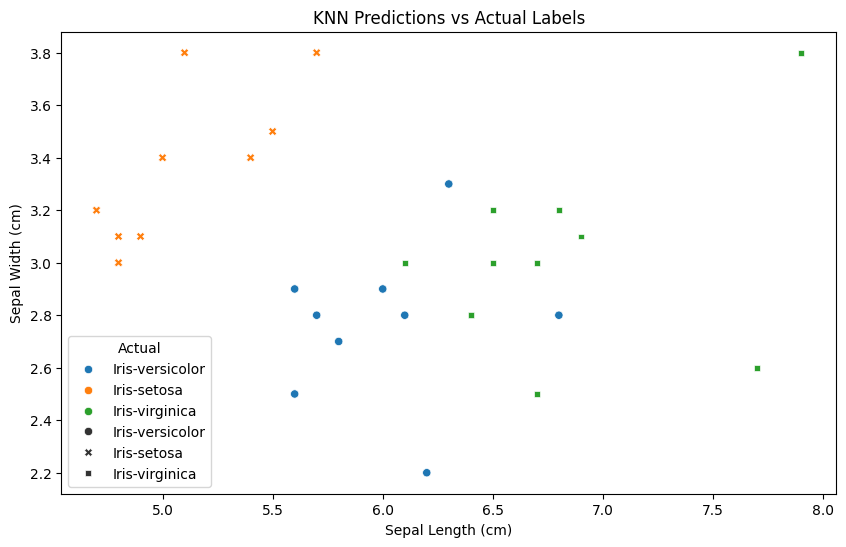

In [49]:
plt.figure(figsize=(10, 6)) # Pengaturan ukuran visual
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred, style=y_test['class']) # Pemanggilan scatter plot untuk data prediksi mewakili warna dan data asli mewakili bentuk
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KNN Predictions vs Actual Labels')
plt.legend(title='Actual')
plt.show()

Warna menunjukkan data hasil dari prediksi, sedangkan bentuk menunjukkan data aktual. Dapat diketahui bahwa data hasil prediksi sudah sesuai dengan data aktual

# Confusion Matrix

Prompt ChatGPT : "Tampilkan Confussion Matriks-nya"

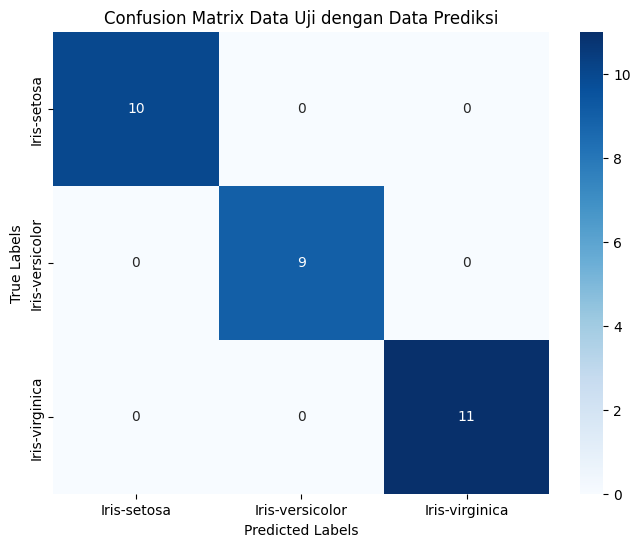

In [54]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))  # Pengaturan ukuran visual
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y['class'].unique(), yticklabels=y['class'].unique())  # Pengaturan data untuk visualisasi dengan nama baris dan kolom
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Data Uji dengan Data Prediksi')
plt.show()